# Project aims to explore relationships between stock market and news
This notebook is doing a preliminary exploration of the data

## Imports

In [1]:
import pandas as pd
import math

## News Data

In [2]:
news_data = pd.read_csv ( 'data/news/Combined_News_DJIA.csv')
news_data.columns

Index(['Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15',
       'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23',
       'Top24', 'Top25'],
      dtype='object')

In [3]:
def process_entry ( entry ):
    if ( entry != entry ):
        return ""
    return entry[2:-1]

In [18]:
headlines = []
for i,row in news_data.iterrows():
    _date = row[0]
    _headlines = list( map( process_entry, row[2:].values ) )
    headlines.append( (_date, _headlines) )
    if ( i > 500 ):
        break

In [19]:
len(headlines)

502

In [20]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to C:\Users\Eric
[nltk_data]     Robertson\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [21]:
scores = []
for (date, text) in headlines:
    neg = 0
    neu = 0
    pos = 0
    compound = 0
    for article in text:
        _scores = sid.polarity_scores(article)
        neg += _scores['neg']
        neu += _scores['neu']
        pos += _scores['pos']
        compound += _scores['compound']
    scores.append( (date,neg,neu,pos,compound) )

In [22]:
len(scores)

502

In [23]:
df = pd.DataFrame(scores, columns =['date', 'neg', 'neu', 'pos', 'compound']) 

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

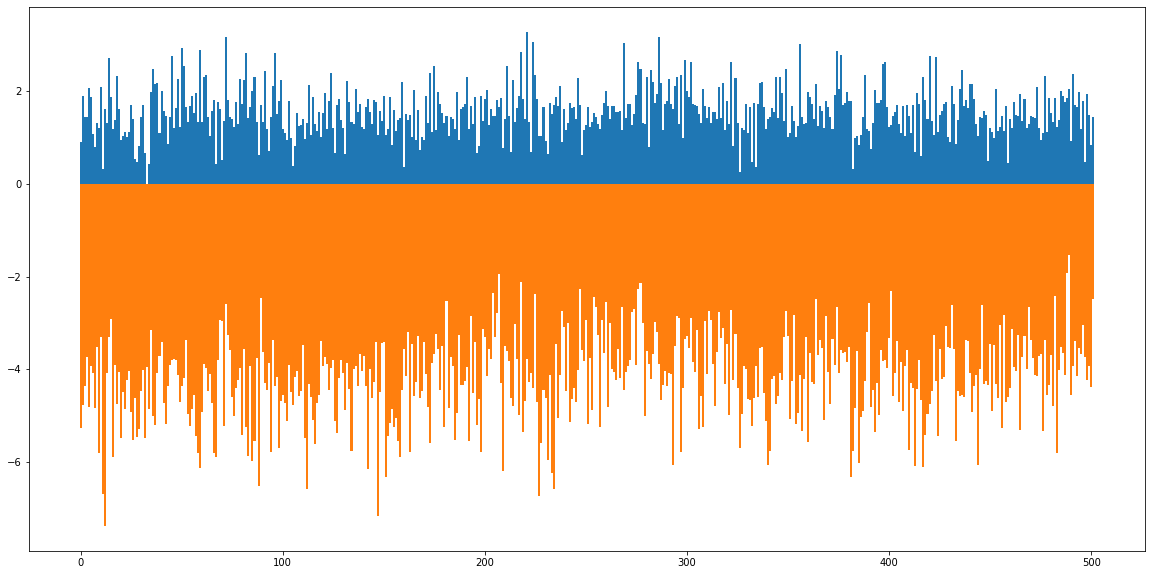

In [27]:
plt.figure(figsize=(20,10))
p1 = plt.bar( df.index, df['pos'], width=1)
p2 = plt.bar( df.index, - df['neg'], bottom = 0, width=1)
plt.show()

In [29]:
sid.polarity_scores("boy saved in georgia")

{'neg': 0.0, 'neu': 0.517, 'pos': 0.483, 'compound': 0.4215}

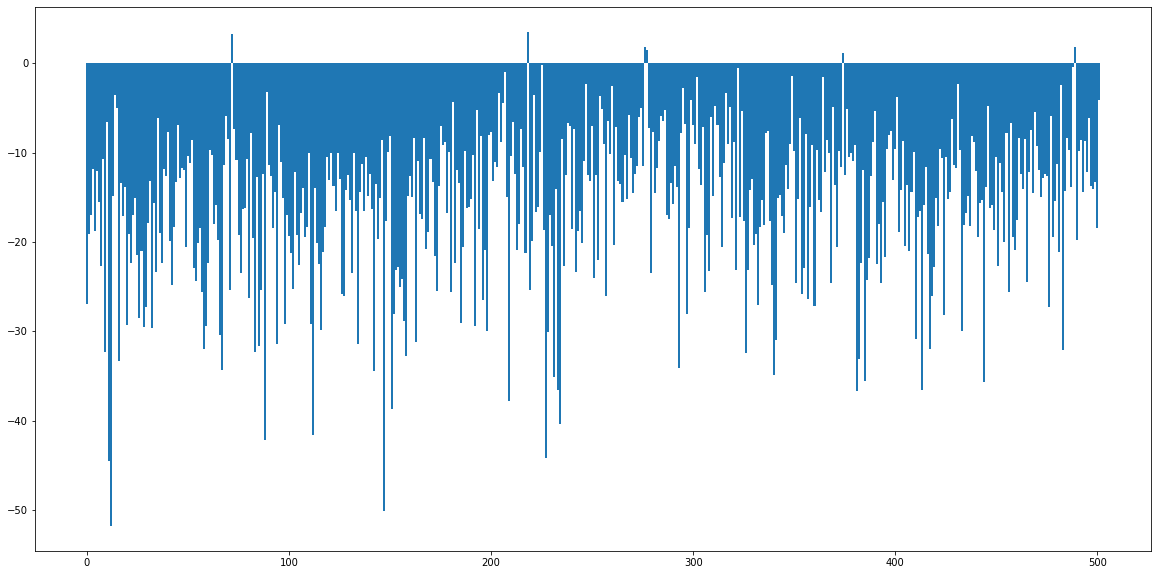

In [30]:
plt.figure(figsize=(20,10))
p1 = plt.bar( df.index, df['pos']**2 - df['neg']**2, width=1)
plt.show()

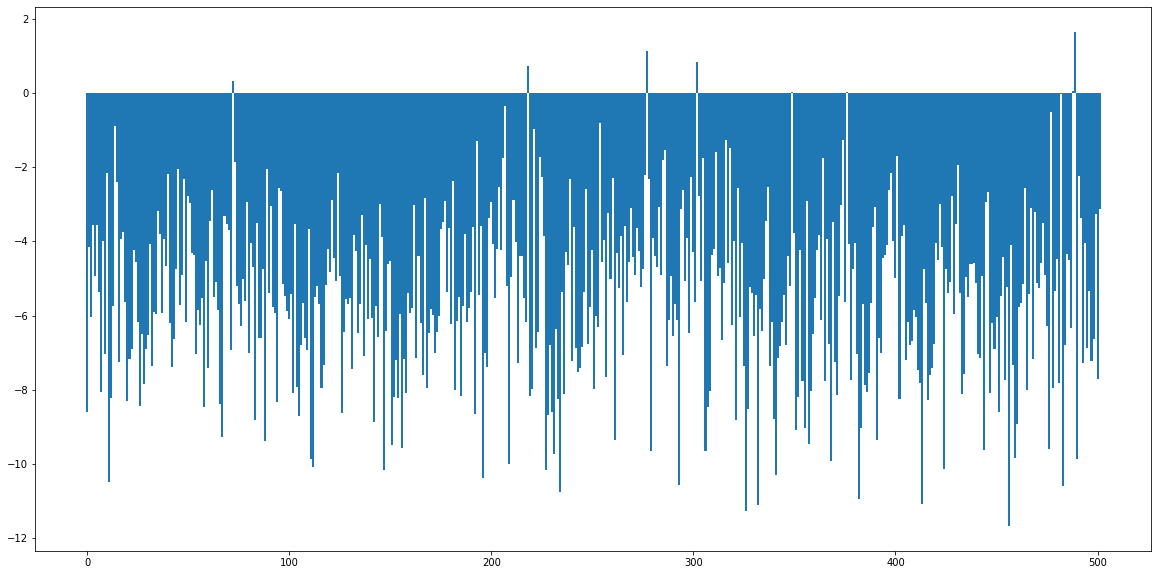

In [51]:
plt.figure(figsize=(20,10))
p1 = plt.bar( df.index, df['compound'], width=1)
plt.show()

In [33]:
happy_days = df[df['pos']**2 - df['neg']**2 > 0]

In [34]:
happy_days.head()

,date,neg,neu,pos,compound
72,2008-11-19,2.600,19.234,3.166,0.3237
218,2009-06-22,2.124,20.040,2.836,0.7279
276,2009-09-14,2.266,20.100,2.632,-2.2234
277,2009-09-15,2.145,17.388,2.467,1.1226
374,2010-02-03,2.652,19.482,2.865,-1.2724


In [48]:
happy_days = headlines[72]
print( happy_days[1])

['Bush ignored by the other world leaders at the G20 meeting', 'Israel Bans International Media from Gaza, Arrests Human Rights Activists', 'Somali Pirates: We dont consider ourselves sea bandits, he said. We consider sea bandits those who illegally fish in our seas and dump waste in our seas and carry weapons in our seas."', 'Teenage Indian boy was thrashed, paraded through the streets with his head shaved and then thrown under a train for daring to write a love letter to a girl from a different caste. ', 'Russia to build nuclear reactor for Chvez', 'The $23 Million Ceiling at UN European headquarters in Geneva', 'Man, the Dutch have it good [PIC]', 'IMF finally approves $2.1B loan to Iceland', 'Afghanistan drug production up 150% since 2001', 'Hebrew papers told of Arab plan', 'India praised for sinking pirates', "Under Iraq Troop Pact , US Can't Leave Any Forces (Military or Civilian Contractors) Behind", 'Crisis in paradise: Meltdown leaves ghost resorts.', "U.S. Missile Strikes be

In [50]:
for day in happy_days[1] :
    print( sid.polarity_scores(day), day )

{'neg': 0.187, 'neu': 0.813, 'pos': 0.0, 'compound': -0.3182} Bush ignored by the other world leaders at the G20 meeting
{'neg': 0.244, 'neu': 0.756, 'pos': 0.0, 'compound': -0.4404} Israel Bans International Media from Gaza, Arrests Human Rights Activists
{'neg': 0.217, 'neu': 0.783, 'pos': 0.0, 'compound': -0.8074} Somali Pirates: We dont consider ourselves sea bandits, he said. We consider sea bandits those who illegally fish in our seas and dump waste in our seas and carry weapons in our seas."
{'neg': 0.0, 'neu': 0.801, 'pos': 0.199, 'compound': 0.7717} Teenage Indian boy was thrashed, paraded through the streets with his head shaved and then thrown under a train for daring to write a love letter to a girl from a different caste. 
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} Russia to build nuclear reactor for Chvez
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} The $23 Million Ceiling at UN European headquarters in Geneva
{'neg': 0.0, 'neu': 0.674, 'pos': 0.326, '

## Ok, so the news titles themselves are mostly negative / factual statements that dont have much in relation to the market in general
Why not train a custom classifier on the scores vs the market ?